In [2]:

if (!require('akima')) install.packages('akima', repos = 'http://cran.us.r-project.org'); require('akima')

Loading required package: akima
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'akima'"

package 'akima' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dave\AppData\Local\Temp\RtmpqE3Bq0\downloaded_packages


Loading required package: akima
Warning message:
"package 'akima' was built under R version 3.3.3"

In [ ]:

install.packages(path_to_file, repos = NULL, type="source")

In [ ]:

# From https://stackoverflow.com/questions/11531059/creating-a-continuous-heat-map-in-r
data <- data.frame(x=c(1,1,2,2,3,4,5,6,7,7,8,9),
                   y=c(2,4,5,1,3,8,4,8,1,1,6,9),
                   distance=c(66,84,93,76,104,29,70,19,60,50,46,36))
resolution <- 0.001 # you can increase the resolution by decreasing this number
# (warning: the resulting dataframe size increase very quickly)
a <- interp(x=data$x, y=data$y, z=data$distance, 
            xo=seq(min(data$x),max(data$x),by=resolution), 
            yo=seq(min(data$y),max(data$y),by=resolution), duplicate='mean')
image(a) #you can of course modify the color palette and the color categories. See ?image for more explanation

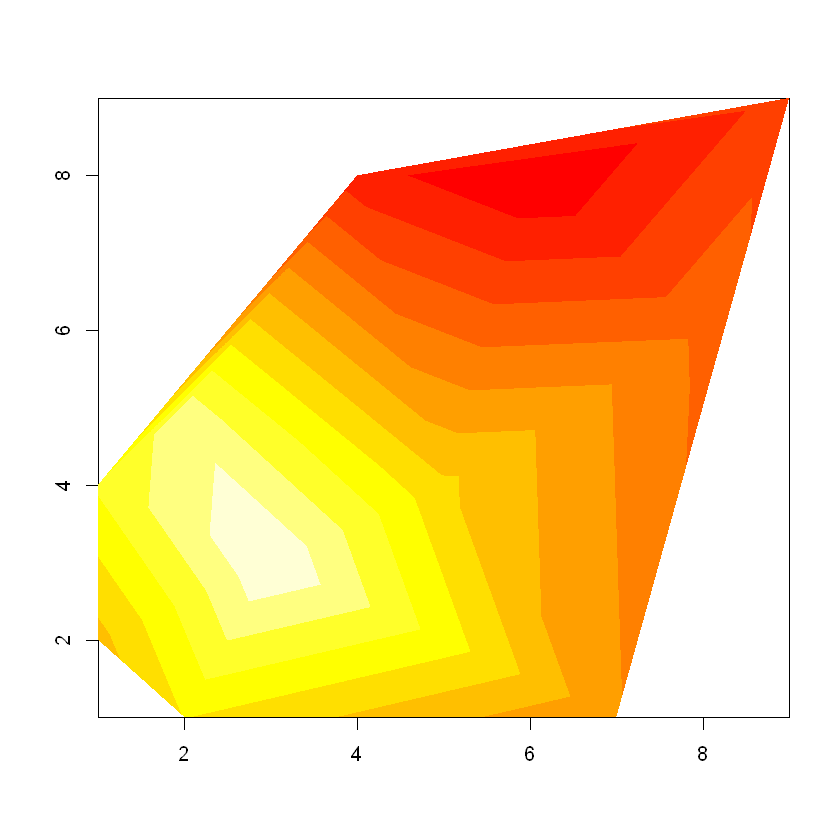

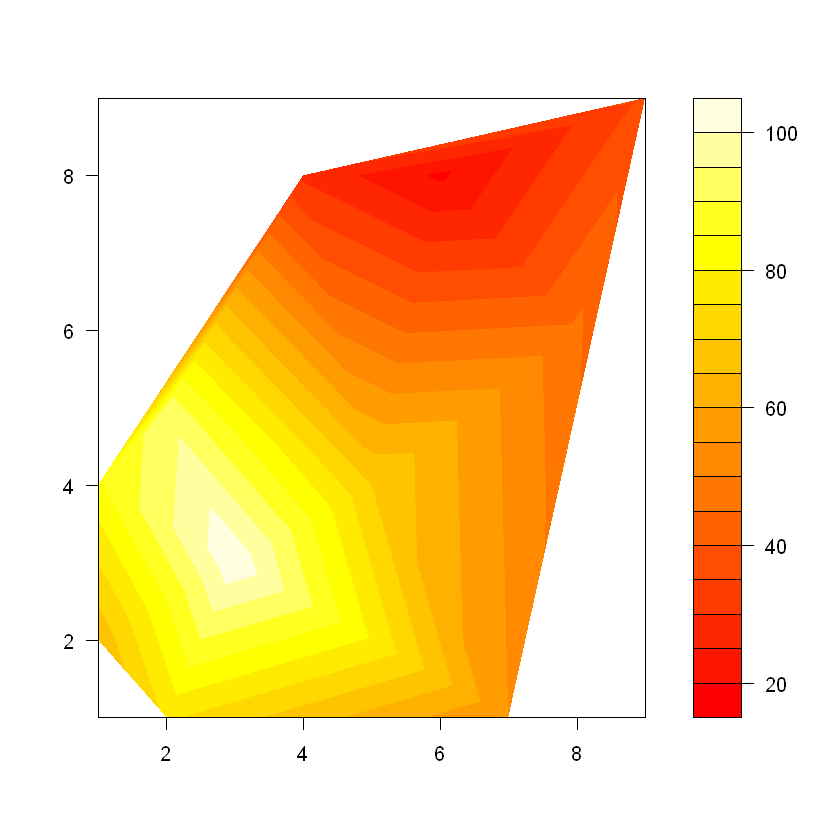

In [8]:

filled.contour(a, color.palette=heat.colors)

In [29]:

tweets.csv <- read.csv('../data/csv/tweets.csv', na.strings = c('.', 'NA', '', '?'),
                       strip.white = TRUE, encoding = 'Latin1', stringsAsFactors = FALSE)
colnames(tweets.csv) <- c('tweetID', 'tweetTime', 'tweetAuthor', 'tweetText')

In [41]:

if (!require('chron')) install.packages('chron', repos = 'http://cran.us.r-project.org'); require('chron')
dtparts <- t(as.data.frame(strsplit(tweets.csv$tweetTime,' ')))
row.names(dtparts) <- NULL

[1] "double"

In [43]:

tweets.csv$tweetTime <- as.POSIXct(chron(dates = dtparts[, 1], times = dtparts[, 2], format = c('y-m-d', 'h:m:s')))

In [44]:

tweets.csv$tweetTime[1]

[1] "2014-08-12 19:25:07 CDT"

In [45]:

# Save a copy to manipulate in Excel
write.csv(tweets.csv, file = '../saves/csv/tweets.csv', row.names = FALSE)

In [46]:

# aggregate POSIXct seconds data every 10 minutes
if (!require('zoo')) install.packages('zoo', repos = 'http://cran.us.r-project.org'); require('zoo')
x <- zoo(tweets.csv$tweetTime)
x.agg <- aggregate(x, time(x) - as.numeric(time(x)) %% 600, mean)
max(strftime(tweets.csv$tweetTime, format = '%H:%M'))

[1] "19:46"

In [53]:

x.min <- min(strftime(tweets.csv$tweetTime, format = '%H:%M'))
x.min <- as.numeric(strftime(as.POSIXct(x.min, format = '%H:%M'),
                             format = '%H'))*60 + as.numeric(strftime(as.POSIXct(x.min, format = '%H:%M'), format = '%M'))
x.max <- max(strftime(tweets.csv$tweetTime, format = '%H:%M'))
x.max <- as.numeric(strftime(as.POSIXct(x.max, format = '%H:%M'),
                             format = '%H'))*60 + as.numeric(strftime(as.POSIXct(x.max, format = '%H:%M'), format = '%M'))
seq(x.min, x.max)

[1] 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179
[16] 1180 1181 1182 1183 1184 1185 1186

In [54]:

# %U is Decimal week of the year (starting on Sunday)
y.min <- as.numeric(min(strftime(tweets.csv$tweetTime, format = '%u')))
y.max <- as.numeric(max(strftime(tweets.csv$tweetTime, format = '%u')))
seq(y.min, y.max)

[1] 2

In [48]:

data <- data.frame(x = seq(x.min, x.max),
                   y = rep(y.min:y.max, each = x.max-x.min+1),
                   z = 0,
                   stringsAsFactors = FALSE)

In [49]:

# Loop through all the tweets and tally the minutes
for(i in 1:nrow(tweets.csv)) {
    x <- as.numeric(strftime(tweets.csv[i, 'tweetTime'],
                             format = '%H'))*60 + as.numeric(strftime(tweets.csv[i, 'tweetTime'], format = '%M'))
    
    # %U is Decimal week of the year (starting on Sunday)
    y <- as.numeric(strftime(tweets.csv[i, 'tweetTime'], format = '%u'))
    
    row <- which(data$x == x & data$y == y)
    data[row, 'z'] <- data[row, 'z'] + 1
}

In [52]:

data

x,y,z
1165,2,2895
1166,2,3333
1167,2,3396
1168,2,3292
1169,2,3196
1170,2,3672
1171,2,3434
1172,2,3357
1173,2,3334
1174,2,3148


In [51]:

resolution <- 0.1 # you can increase the resolution by decreasing this number
a <- interp(x = data$x, y = data$y, z = data$z, 
            xo = seq(min(data$x), max(data$x), by = resolution), 
            yo = seq(min(data$y), max(data$y), by = resolution), duplicate = 'mean')
a <- interp(x = data$x, y = data$y, z = data$z)
image(a) #you can of course modify the color palette and the color categories. See ?image for more explanation

ERROR: Error in interp.old(x, y, z, xo, yo, ncp = 0, extrap = FALSE, duplicate = duplicate, : all data collinear


In [ ]:

filled.contour(a, color.palette = heat.colors, plot.axes = { axis(1, seq(x.min, x.max, by = 60))
                                                         axis(2, y.min:y.max)})